In [129]:
import math
import os
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [3]:
weather = pd.read_csv('weather-underground.csv', encoding = 'latin-1')

In [5]:
weather.head()

,date,maxpressurem,maxdewptm,maxpressurei,maxdewpti,since1julheatingdegreedaysnormal,heatingdegreedaysnormal,since1sepcoolingdegreedaysnormal,hail,since1julsnowfallm,...,precipi,snowfalli,since1jancoolingdegreedaysnormal,precipm,snowfallm,thunder,monthtodateheatingdegreedays,meantempi,maxvism,meantempm
0,2011-05-01,1026,6,30.31,42,4646,8,NaN,0,157.23,...,0.0,0.0,13,0.0,0.0,0,5,60,16,16
1,2011-05-02,1026,10,30.31,50,4653,7,NaN,0,157.23,...,0.0,0.0,14,0.0,0.0,0,13,57,16,14
2,2011-05-03,1021,15,30.14,59,4660,7,NaN,0,157.23,...,0.0,0.0,15,0.0,0.0,0,13,65,16,18
3,2011-05-04,1017,14,30.03,57,4667,7,NaN,0,157.23,...,0.5,0.0,16,12.7,0.0,0,23,55,16,13
4,2011-05-05,1016,4,30.01,39,4673,6,NaN,0,157.23,...,0.0,0.0,17,0.0,0.0,0,32,56,16,13


- ¿Cuántos días ha llovido?

In [30]:
dias = weather[weather['rain'] != 0]['rain']
dias

3     1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
22    1
29    1
Name: rain, dtype: int64

In [31]:
dias.shape

(10,)

Por lo tanto, 10 días ha llovido.

- ¿Cuál ha sido la temperatura máxima para días con neblina y dias sin neblina?

In [20]:
weather.keys()

Index(['date', 'maxpressurem', 'maxdewptm', 'maxpressurei', 'maxdewpti',
       'since1julheatingdegreedaysnormal', 'heatingdegreedaysnormal',
       'since1sepcoolingdegreedaysnormal', 'hail', 'since1julsnowfallm',
       'since1julheatingdegreedays', 'maxvisi',
       'since1sepheatingdegreedaysnormal', 'heatingdegreedays', 'mindewptm',
       'since1sepheatingdegreedays', 'maxwspdm', 'since1julsnowfalli',
       'since1sepcoolingdegreedays', 'snow', 'meanvism', 'meandewptm',
       'snowdepthm', 'meanvisi', 'fog', 'snowdepthi', 'minvism',
       'since1jancoolingdegreedays', 'minvisi', 'coolingdegreedaysnormal',
       'gdegreedays', 'maxwspdi', 'meanwindspdi', 'meanpressurei',
       'monthtodateheatingdegreedaysnormal', 'meanwindspdm', 'meanpressurem',
       'tornado', 'mindewpti', 'mintempi', 'meandewpti', 'rain', 'mintempm',
       'minhumidity', 'precipsource', 'minwspdi', 'meanwdird', 'meanwdire',
       'minwspdm', 'monthtodatesnowfalli',
       'monthtodatecoolingdegreedays

In [21]:
weather['fog'].head()

0    0
1    0
2    0
3    0
4    0
Name: fog, dtype: int64

In [27]:
c_neblina = weather[weather['fog'] == 1]
c_neblina.head()

,date,maxpressurem,maxdewptm,maxpressurei,maxdewpti,since1julheatingdegreedaysnormal,heatingdegreedaysnormal,since1sepcoolingdegreedaysnormal,hail,since1julsnowfallm,...,precipi,snowfalli,since1jancoolingdegreedaysnormal,precipm,snowfallm,thunder,monthtodateheatingdegreedays,meantempi,maxvism,meantempm
14,2011-05-15,1007,18,29.74,65,4723,4,NaN,0,157.23,...,0.89,0.0,29,22.61,0.0,0,57,64,16,18
17,2011-05-18,1017,16,30.03,61,4734,3,NaN,0,157.23,...,2.18,0.0,35,55.37,0.0,0,77,61,16,16
18,2011-05-19,1017,18,30.05,64,4737,3,NaN,0,157.23,...,0.07,0.0,37,0.06,0.0,0,77,68,16,20
22,2011-05-23,1021,17,30.15,63,4749,3,NaN,0,157.23,...,0.10,0.0,47,2.54,0.0,0,94,61,16,16
23,2011-05-24,1009,21,29.81,70,4751,2,NaN,0,157.23,...,0.00,0.0,50,0.00,0.0,0,94,74,16,23


In [28]:
s_neblina = weather[weather['fog'] == 0]
s_neblina.head()

,date,maxpressurem,maxdewptm,maxpressurei,maxdewpti,since1julheatingdegreedaysnormal,heatingdegreedaysnormal,since1sepcoolingdegreedaysnormal,hail,since1julsnowfallm,...,precipi,snowfalli,since1jancoolingdegreedaysnormal,precipm,snowfallm,thunder,monthtodateheatingdegreedays,meantempi,maxvism,meantempm
0,2011-05-01,1026,6,30.31,42,4646,8,NaN,0,157.23,...,0.0,0.0,13,0.0,0.0,0,5,60,16,16
1,2011-05-02,1026,10,30.31,50,4653,7,NaN,0,157.23,...,0.0,0.0,14,0.0,0.0,0,13,57,16,14
2,2011-05-03,1021,15,30.14,59,4660,7,NaN,0,157.23,...,0.0,0.0,15,0.0,0.0,0,13,65,16,18
3,2011-05-04,1017,14,30.03,57,4667,7,NaN,0,157.23,...,0.5,0.0,16,12.7,0.0,0,23,55,16,13
4,2011-05-05,1016,4,30.01,39,4673,6,NaN,0,157.23,...,0.0,0.0,17,0.0,0.0,0,32,56,16,13


In [34]:
c_neblina['maxtempm'].max()

27

In [35]:
s_neblina['maxtempm'].max()

30

In [85]:
c_neblina['maxtempi'].max()

81

In [86]:
s_neblina['maxtempi'].max()

86

- ¿Cuál es la temperatura promedio durante fines de semana?

In [45]:
# Mayo 1 2011 fue Domingo
weather['date'].iloc[0]

'2011-05-01'

In [46]:
weather.shape

(30, 70)

In [78]:
b = pd.DataFrame()
b = pd.DataFrame.append(b, weather[weather['date'] == weather['date'].iloc[0]])
pd.DataFrame.append(b, weather[weather['date'] == weather['date'].iloc[0]])

,date,maxpressurem,maxdewptm,maxpressurei,maxdewpti,since1julheatingdegreedaysnormal,heatingdegreedaysnormal,since1sepcoolingdegreedaysnormal,hail,since1julsnowfallm,...,precipi,snowfalli,since1jancoolingdegreedaysnormal,precipm,snowfallm,thunder,monthtodateheatingdegreedays,meantempi,maxvism,meantempm
0,2011-05-01,1026,6,30.31,42,4646,8,NaN,0,157.23,...,0.0,0.0,13,0.0,0.0,0,5,60,16,16


In [168]:
c = pd.DataFrame()
for i in range (5):
    c = pd.DataFrame.append(c, weather[weather['date'] == weather['date'].iloc[i*7-1]])
    c = pd.DataFrame.append(c, weather[weather['date'] == weather['date'].iloc[i*7]])

   # pd.concat([a, weather[weather['date'] == weather['date'].iloc[0]]])
    #a = weather[weather['date'] == weather['date'].iloc[7]]

In [169]:
c

,date,maxpressurem,maxdewptm,maxpressurei,maxdewpti,since1julheatingdegreedaysnormal,heatingdegreedaysnormal,since1sepcoolingdegreedaysnormal,hail,since1julsnowfallm,...,precipi,snowfalli,since1jancoolingdegreedaysnormal,precipm,snowfallm,thunder,monthtodateheatingdegreedays,meantempi,maxvism,meantempm
29,2011-05-30,1020,21,30.13,70,4763,2,NaN,0,157.23,...,0.29,0.0,71,7.37,0.0,0,94,78,16,26
0,2011-05-01,1026,6,30.31,42,4646,8,NaN,0,157.23,...,0.00,0.0,13,0.00,0.0,0,5,60,16,16
6,2011-05-07,1011,8,29.87,47,4685,6,NaN,0,157.23,...,0.00,0.0,19,0.00,0.0,0,37,64,16,18
7,2011-05-08,1014,9,29.96,48,4691,6,NaN,0,157.23,...,0.00,0.0,20,0.00,0.0,0,39,63,16,17
13,2011-05-14,1012,13,29.89,55,4719,4,NaN,0,157.23,...,0.00,0.0,27,0.00,0.0,0,56,61,16,16
14,2011-05-15,1007,18,29.74,65,4723,4,NaN,0,157.23,...,0.89,0.0,29,22.61,0.0,0,57,64,16,18
20,2011-05-21,1017,17,30.05,63,4743,3,NaN,0,157.23,...,0.07,0.0,41,1.78,0.0,0,81,67,16,19
21,2011-05-22,1023,14,30.20,57,4746,3,NaN,0,157.23,...,0.00,0.0,44,0.00,0.0,0,90,56,16,13
27,2011-05-28,1019,20,30.09,68,4759,2,NaN,0,157.23,...,0.00,0.0,63,0.00,0.0,0,94,76,16,24
28,2011-05-29,1021,21,30.14,69,4761,2,NaN,0,157.23,...,0.00,0.0,67,0.00,0.0,0,94,75,16,24


In [166]:
c['meantempi'].mean()

64.125

In [167]:
c['meantempm'].mean()

17.875

- ¿Cuál es el promedio de la temperatura minima en días lluviosos que tienen una temperatura minima de 55 grados F?

In [105]:
dias_lluviosos = weather[weather['rain'] != 0]
dias_lluviosos

,date,maxpressurem,maxdewptm,maxpressurei,maxdewpti,since1julheatingdegreedaysnormal,heatingdegreedaysnormal,since1sepcoolingdegreedaysnormal,hail,since1julsnowfallm,...,precipi,snowfalli,since1jancoolingdegreedaysnormal,precipm,snowfallm,thunder,monthtodateheatingdegreedays,meantempi,maxvism,meantempm
3,2011-05-04,1017,14,30.03,57,4667,7,NaN,0,157.23,...,0.50,0.0,16,12.70,0.0,0,23,55,16,13
14,2011-05-15,1007,18,29.74,65,4723,4,NaN,0,157.23,...,0.89,0.0,29,22.61,0.0,0,57,64,16,18
15,2011-05-16,1011,16,29.87,61,4727,4,NaN,0,157.23,...,0.17,0.0,31,4.32,0.0,0,64,58,10,14
16,2011-05-17,1015,14,29.98,57,4731,4,NaN,0,157.23,...,0.67,0.0,33,17.02,0.0,0,73,56,16,13
17,2011-05-18,1017,16,30.03,61,4734,3,NaN,0,157.23,...,2.18,0.0,35,55.37,0.0,0,77,61,16,16
18,2011-05-19,1017,18,30.05,64,4737,3,NaN,0,157.23,...,0.07,0.0,37,0.06,0.0,0,77,68,16,20
19,2011-05-20,1015,16,29.99,61,4740,3,NaN,0,157.23,...,0.24,0.0,39,6.10,0.0,0,81,61,14,16
20,2011-05-21,1017,17,30.05,63,4743,3,NaN,0,157.23,...,0.07,0.0,41,1.78,0.0,0,81,67,16,19
22,2011-05-23,1021,17,30.15,63,4749,3,NaN,0,157.23,...,0.10,0.0,47,2.54,0.0,0,94,61,16,16
29,2011-05-30,1020,21,30.13,70,4763,2,NaN,0,157.23,...,0.29,0.0,71,7.37,0.0,0,94,78,16,26


In [99]:
dias_lluviosos[dias_lluviosos['mintempi']<55]['mintempi']

3     46
15    53
16    52
17    54
Name: mintempi, dtype: int64

In [100]:
dias_lluviosos[dias_lluviosos['mintempi']<55]['mintempi'].mean()

51.25

In [141]:
dias_lluviosos[dias_lluviosos['mintempi']>55]['mintempi'].mean()

61.25

- ¿Cuántos días hay con granizo?

In [108]:
weather.keys()

Index(['date', 'maxpressurem', 'maxdewptm', 'maxpressurei', 'maxdewpti',
       'since1julheatingdegreedaysnormal', 'heatingdegreedaysnormal',
       'since1sepcoolingdegreedaysnormal', 'hail', 'since1julsnowfallm',
       'since1julheatingdegreedays', 'maxvisi',
       'since1sepheatingdegreedaysnormal', 'heatingdegreedays', 'mindewptm',
       'since1sepheatingdegreedays', 'maxwspdm', 'since1julsnowfalli',
       'since1sepcoolingdegreedays', 'snow', 'meanvism', 'meandewptm',
       'snowdepthm', 'meanvisi', 'fog', 'snowdepthi', 'minvism',
       'since1jancoolingdegreedays', 'minvisi', 'coolingdegreedaysnormal',
       'gdegreedays', 'maxwspdi', 'meanwindspdi', 'meanpressurei',
       'monthtodateheatingdegreedaysnormal', 'meanwindspdm', 'meanpressurem',
       'tornado', 'mindewpti', 'mintempi', 'meandewpti', 'rain', 'mintempm',
       'minhumidity', 'precipsource', 'minwspdi', 'meanwdird', 'meanwdire',
       'minwspdm', 'monthtodatesnowfalli',
       'monthtodatecoolingdegreedays

In [111]:
weather[weather['snow'] == 1].shape

(0, 70)

- ¿Cuál es la presión promedio?

In [115]:
weather['maxpressurem'].mean()

1016.7333333333333

In [117]:
weather['maxpressurei'].mean()

30.03133333333334

- Gráfica de días contra since1janheatingdegrees

In [140]:
dates = weather['date']
degrees = weather['since1julheatingdegreedays']

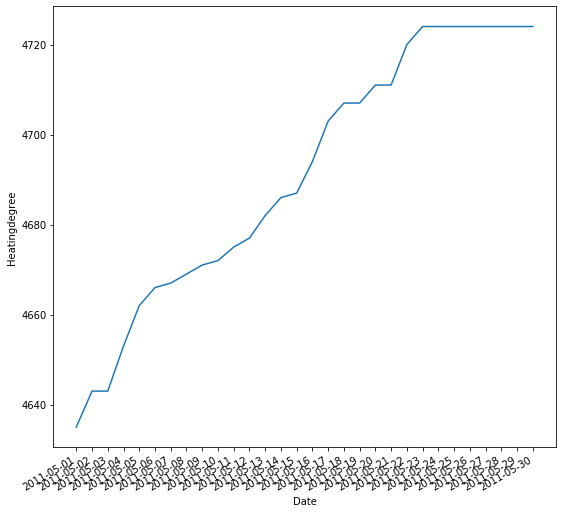

In [138]:
plt.figure(figsize = (9,9))
plt.plot(dates, degrees)
plt.xlabel('Date')
plt.ylabel('Heatingdegree')
plt.gcf().autofmt_xdate()